In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

In [5]:
#Bigrams
b = {}
for w in words:
    chars = ['<S>'] + list(w) + ['<E>']  # special start or end
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 


In [99]:
sorted(b.items(), key= lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [100]:
#Keep this in a 2-D array -  rows are first char and cols are second.  how often second follows first character with pytorch
import torch

In [101]:
N = torch.zeros((27, 27), dtype=torch.int32)  # we have 26 alphabet and 2 special chars <S> and <E>. since counts above are integers - changed to 1 '.' instead of S and E

In [102]:
# since chars are string, we have to index using integers.so, construct lookup table from chars to integers
chars = sorted(list(set(''.join(words))))  #entire dataset as a single string of unique values and sort as a list
stoi = {s:i+1 for i,s in enumerate(chars)}    #we are mapping String TO Integer
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}  #we are mapping Integer TO String - this is the reverse of stoi

In [103]:
#Bigrams
for w in words:
    chars = ['.'] + list(w) + ['.']  # special start or end
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]   # stoi is the map and ix1 is the index of the first character example: stoi['.'] = 0 ('.': 0)
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

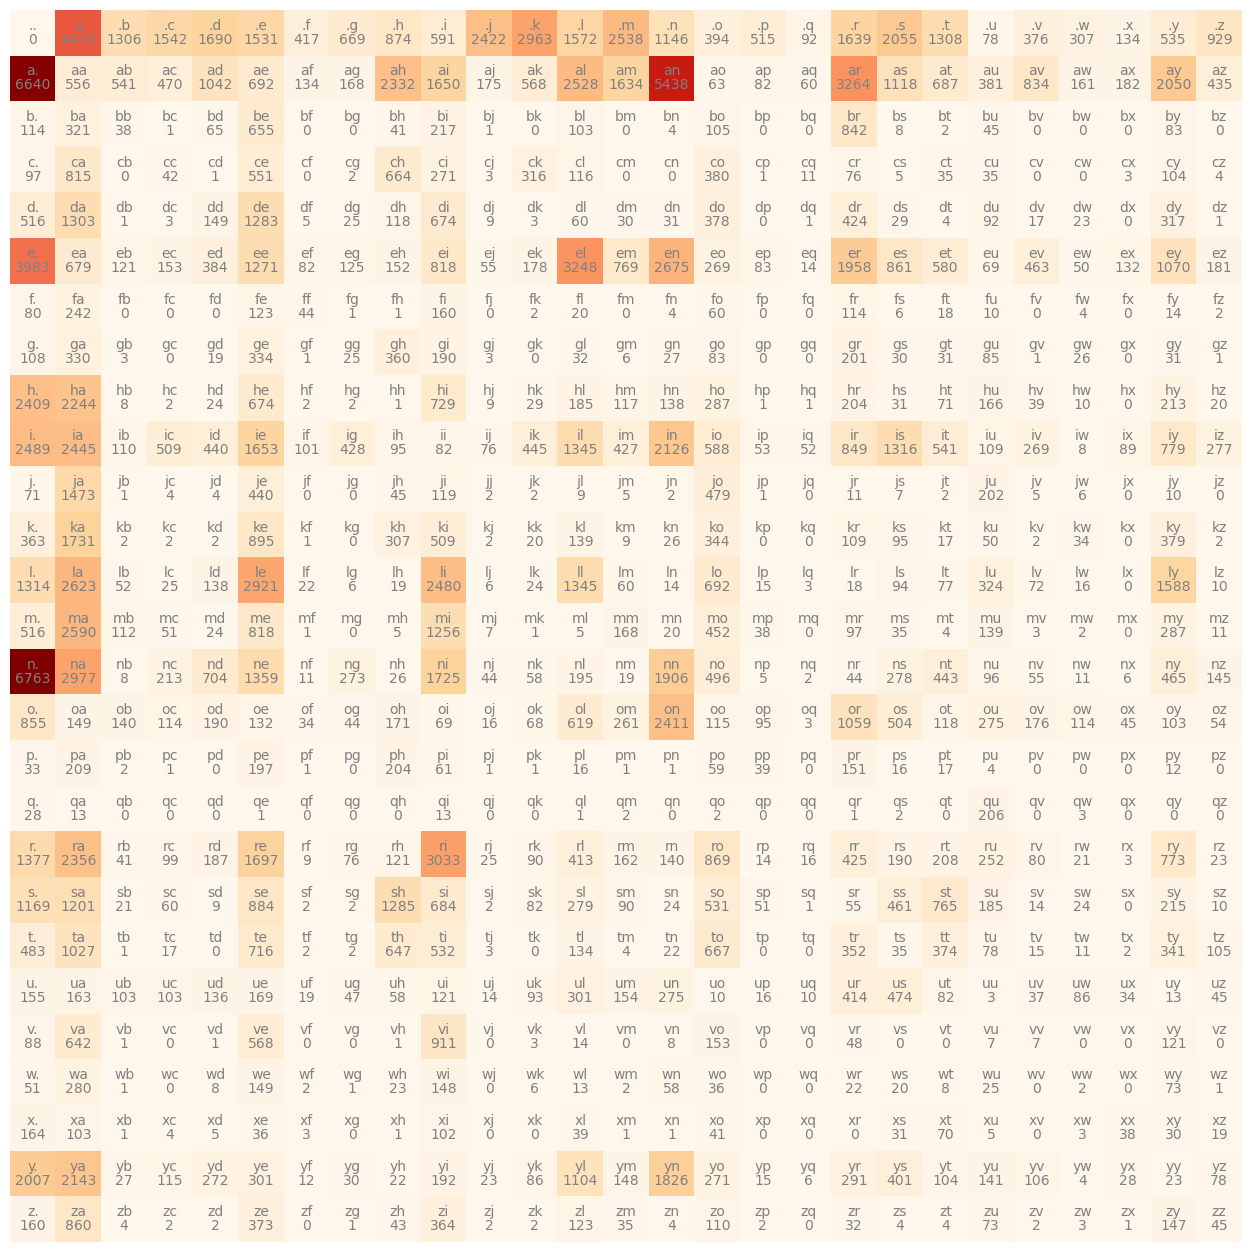

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16)) # size of the figure
plt.imshow(N, cmap='OrRd')  # N is the 2D array we created above
for i in range(27):
    for j in range(27):
        charstr = itos[i] + itos[j]  # itos is the reverse mapping from index to character
        plt.text(j, i, charstr, ha='center', va='bottom', color='gray')  # ha is horizontal alignment, va is vertical alignment
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')  # N[i, j] is the count of the bigram, item() is to get the value, not the tensor but the int value
plt.axis('off') 

In [105]:
N[0] # first row is the counts of the bigram starting with '.'

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [106]:
p = N[0].float()  # convert to float for probability calculation
p = p / p.sum()  # normalize to get probabilities
p # this is the probability of each character following the start character '.'

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [107]:
print(p)
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()   # sample, num_samples=20 means we want to sample 20 characters, replacement=True means we can sample the same character multiple times
itos[ix] # get the integer value from the tensor

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


'j'

tensor([0.6064, 0.3033, 0.0903])


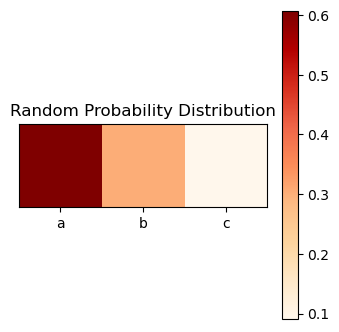

In [108]:
g = torch.Generator().manual_seed(2147483647)  # deterministic random number generator for reproducibility - this is the maximum seed value for 32-bit integers
p = torch.rand(3, generator=g) # random probabilities for 3 elements
p /= p.sum()  # normalize to get probabilities
print(p)  # this is a random probability distribution over 3 elements
plt.figure(figsize=(4, 4)) # size of the figure
plt.imshow(p[None, :], cmap='OrRd')  # p is a 1D array, so we need to add a new dimension to make it 2D for visualization
plt.xticks(range(3), ['a', 'b', 'c'])  # set x-ticks to the characters
plt.yticks([])  # no y-ticks
plt.colorbar()  # add a colorbar to show the scale
plt.title('Random Probability Distribution')  # title of the plot
plt.show()

In [109]:
# We will use torch.multinomial to sample from this distribution
ix = torch.multinomial(p, num_samples=100, replacement=True, generator=g)  # sample, num_samples=20 means we want to sample 20 characters, replacement=True means we can sample the same character multiple times
ix

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [110]:
P = N.float()  # convert to float for probability calculation
# print(P.sum(dim=1, keepdim=True).shape)  # (27 by 1)
P /= P.sum(dim=1, keepdim=True)  # normalize to get probabilities - dim=1 means normalize along the first dimension means normalize along the rows, keepdim=True keeps the dimensions for broadcasting

In [111]:
# Aligning two arrays for broadcasting (27, 27) and (27, 1) to (27, 27). rules for this are:
# 1. If the dimensions are equal, they are aligned.
# 2. If one of the dimensions is 1, it is stretched to match the other dimension.
# 3. If the dimensions are not equal and neither is 1, an error is raised.
p.shape

torch.Size([3])

In [112]:
P.shape

torch.Size([27, 27])

In [113]:
P.sum(dim=1, keepdim=True).shape  # (27 by 1) - this is the sum of each row, keepdim=True keeps the dimensions for broadcasting


torch.Size([27, 1])

In [114]:
#27, 27
# 1, 27
P.sum(dim = 1).shape # keepdim=False means the dimensions are reduced/ squeezed. bug here is we are not able to broadcast the 2D array with 1D array. so, we need to keep the dimensions for broadcasting by setting keepdim=True 

torch.Size([27])

In [115]:
# --- IGNORE ---
a= P
b = P.sum(dim=1, keepdim=False)
c = P.sum(dim=1, keepdim=True)
print(a.shape)
print(b.shape)
print(c.shape)
print((a/b).shape)
print (a/b)

print((a/c).shape)
print (a/c)
print((a/b) - (a/c))
# --- IGNORE ---

torch.Size([27, 27])
torch.Size([27])
torch.Size([27, 1])
torch.Size([27, 27])
tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02

In [116]:
P = (N+1).float()  # convert to float for probability calculation, add fake count to avoid zero probabilities and to avoid division by zero errors(model smoothing)
# print(P.sum(dim=1, keepdim=True).shape)  # (27 by 1)
P /= P.sum(dim=1, keepdim=True)  # normalize to get probabilities - dim=1 means normalize along the first dimension means normalize along the rows, keepdim=True keeps the dimensions for broadcasting

In [117]:
g = torch.Generator().manual_seed(2147483647)  # deterministic random number generator for reproducibility - this is the maximum seed value for 32-bit integers
for _ in range(5):  # generate 5 characters
    out = []
    ix = 0
    while True:
        #p = N[ix].float()  # convert to float for probability calculation
        #p = p / p.sum()  # normalize to get probabilities
        p = P[ix]  # get the probabilities for the current character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  # sample, num_samples=20 means we want to sample 20 characters, replacement=True means we can sample the same character multiple times
        out.append(itos[ix]) # append the character to the output list from itos mapping - this is the reverse mapping from index to character
        if ix == 0:  # stop when we reach the end character
            break
    print(''.join(out))  # join the characters to form a string


junide.
janasah.
p.
cony.
a.


In [118]:
# GOAL: maximize likelihood of the data w.r.t. the model parameters - in our case, the parameters are the probabilities of the bigrams (statistical modeling)
# equivalent to minimizing the negative log likelihood
# equiivalent to maximizing the log likelihood (because log is a monotonically increasing function)
# equivalent to minimizing the average negative log likelihood per character

# log(a+b+c) = log(a) + log(b) + log(c)

In [119]:
# Evaluate the quality of the model
log_likelihood = 0.0
n = 0

for w in ['bqharath']:
    chars = ['.'] + list(w) + ['.']  # special start or end
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]   # stoi is the map and ix1 is the index of the first character example: stoi['.'] = 0 ('.': 0)
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]  # get the probability of the bigram from the P matrix
        logprob = torch.log(prob) # calculate the log probability
        log_likelihood += logprob
        n += 1
        print(f'{ch1} -> {ch2}: probability: {prob:.4f} logProbability: {logprob:.4f}')  # print the probability with 4 decimal places
print(f'log likelihood: {log_likelihood:.4f}')
neg_log_likelihood = -log_likelihood
print(f'Negative log likelihood: {neg_log_likelihood:.4f}')  # negative log likelihood is the loss we want to minimize
print(f'Average negative log likelihood: {neg_log_likelihood / n:.4f}')  # average negative log likelihood per character

. -> b: probability: 0.0408 logProbability: -3.1999
b -> q: probability: 0.0004 logProbability: -7.8906
q -> h: probability: 0.0033 logProbability: -5.7004
h -> a: probability: 0.2937 logProbability: -1.2251
a -> r: probability: 0.0963 logProbability: -2.3405
r -> a: probability: 0.1852 logProbability: -1.6863
a -> t: probability: 0.0203 logProbability: -3.8977
t -> h: probability: 0.1158 logProbability: -2.1561
h -> .: probability: 0.3153 logProbability: -1.1542
log likelihood: -29.2508
Negative log likelihood: 29.2508
Average negative log likelihood: 3.2501


In [120]:
#alternative way of modelling by neural networks - receives characters as input then there is a hidden layer then output layer and 
# probabilities of next character are calculated from the output layer by gradient descent to minimize the loss by adjusting the weights of the neural network

#Create the training set of all the bigrams (x,y)
xs, ys = [], []
for w in words[:1]:
    chars = ['.'] + list(w) + ['.']  # special start or end
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]   # stoi is the map and ix1 is the index of the first character example: stoi['.'] = 0 ('.': 0)
        ix2 = stoi[ch2]
        print(f'{ch1} -> {ch2}: {ix1} -> {ix2}')
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs.shape)
print(ys.shape)

. -> e: 0 -> 5
e -> m: 5 -> 13
m -> m: 13 -> 13
m -> a: 13 -> 1
a -> .: 1 -> 0
torch.Size([5])
torch.Size([5])


In [121]:
xs

tensor([ 0,  5, 13, 13,  1])

In [122]:
ys

tensor([ 5, 13, 13,  1,  0])

In [123]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()  # one-hot encoding of the input characters, num_classes=27 because we have 26 alphabet and 1 special character '.'
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [124]:
xenc.shape # (n, 27) where n is the number of characters in the input sequence

torch.Size([5, 27])

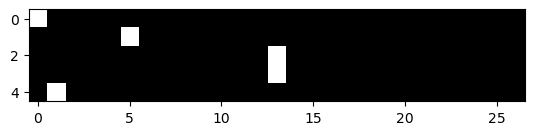

In [125]:
plt.imshow(xenc, cmap='gray')  # visualize the one-hot encoding - whereever there is a 1, it is white and wherever there is a 0, it is black

In [126]:
xenc.dtype  # should be torch.int64, but we need it to be torch.float32 for the neural network

torch.float32

In [131]:
W = torch.randn((27, 27), requires_grad=True)  # weights of the neural network as a column vector, requires_grad=True means we want to calculate the gradients for backpropagation
xenc @ W  # matrix multiplication in pytorch to get the logits for each character, xenc is (n, 27) and W is (27, 1), so the result is (n, 1) above for first name 'emma', n=5


tensor([[-0.0738, -0.8308, -0.3518,  0.1697,  0.4186,  0.2455, -0.7468,  0.1041,
         -0.6214,  1.1581, -0.2567, -2.4944,  1.2254, -1.3525,  0.2634, -0.9649,
         -0.8753, -0.3503,  1.0894,  0.4205, -1.9076, -1.4644, -0.5571,  0.1667,
          0.5825, -1.3160, -0.4698],
        [ 0.0686, -1.9763,  0.0090,  0.7916,  0.8789, -1.0772, -1.2271, -0.7450,
         -1.6362,  0.1381,  1.0746, -0.8213,  1.4364,  0.6033,  1.1654,  0.8006,
         -1.0760, -2.1660, -0.6550, -0.8520,  0.4257,  0.7805, -0.2588, -0.4698,
          0.3769, -0.5343,  0.1763],
        [ 0.5394,  1.0509,  1.4036, -1.1937,  0.0879, -0.1186, -0.5145,  1.9408,
         -0.6619,  1.1340,  1.4906,  1.8707, -2.7699,  1.2816, -0.0855,  1.2881,
         -1.0203, -1.2887, -0.0364,  1.2288, -0.5818, -0.3360, -2.5755,  2.7089,
         -1.1517,  2.6891, -1.1896],
        [ 0.5394,  1.0509,  1.4036, -1.1937,  0.0879, -0.1186, -0.5145,  1.9408,
         -0.6619,  1.1340,  1.4906,  1.8707, -2.7699,  1.2816, -0.0855,  1.2881

In [133]:
(xenc @ W).shape  # (n, 1) where n is the number of characters in the input sequence (5, 27) @ (27, 1) = (5, 1)


torch.Size([5, 27])

In [146]:
logits = (xenc @ W) # log counts = logits # counts are the logits, we will use them to calculate the probabilities
counts = logits.exp()  # equivalent to N
probs = counts / counts.sum(dim=1, keepdim=True)  # normalize to get probabilities
probs  # (n, 1) where n is the number of characters in the

tensor([[0.0332, 0.0156, 0.0251, 0.0423, 0.0543, 0.0457, 0.0169, 0.0396, 0.0192,
         0.1137, 0.0276, 0.0029, 0.1217, 0.0092, 0.0465, 0.0136, 0.0149, 0.0252,
         0.1062, 0.0544, 0.0053, 0.0083, 0.0205, 0.0422, 0.0640, 0.0096, 0.0223],
        [0.0316, 0.0041, 0.0298, 0.0652, 0.0711, 0.0101, 0.0087, 0.0140, 0.0057,
         0.0339, 0.0865, 0.0130, 0.1242, 0.0540, 0.0947, 0.0657, 0.0101, 0.0034,
         0.0153, 0.0126, 0.0452, 0.0644, 0.0228, 0.0185, 0.0430, 0.0173, 0.0352],
        [0.0220, 0.0367, 0.0522, 0.0039, 0.0140, 0.0114, 0.0077, 0.0893, 0.0066,
         0.0399, 0.0569, 0.0833, 0.0008, 0.0462, 0.0118, 0.0465, 0.0046, 0.0035,
         0.0124, 0.0438, 0.0072, 0.0092, 0.0010, 0.1925, 0.0041, 0.1888, 0.0039],
        [0.0220, 0.0367, 0.0522, 0.0039, 0.0140, 0.0114, 0.0077, 0.0893, 0.0066,
         0.0399, 0.0569, 0.0833, 0.0008, 0.0462, 0.0118, 0.0465, 0.0046, 0.0035,
         0.0124, 0.0438, 0.0072, 0.0092, 0.0010, 0.1925, 0.0041, 0.1888, 0.0039],
        [0.1189, 0.0071,

In [147]:
probs.shape  # (n, 1) where n is the number of characters in the input sequence (5, 1) for first name 'emma', n=5

torch.Size([5, 27])

In [150]:
probs[0] # (1,) - this is the probability of the first character in the input sequence, which is 'e' in 'emma' after '.'

tensor([0.0332, 0.0156, 0.0251, 0.0423, 0.0543, 0.0457, 0.0169, 0.0396, 0.0192,
        0.1137, 0.0276, 0.0029, 0.1217, 0.0092, 0.0465, 0.0136, 0.0149, 0.0252,
        0.1062, 0.0544, 0.0053, 0.0083, 0.0205, 0.0422, 0.0640, 0.0096, 0.0223],
       grad_fn=<SelectBackward0>)

In [149]:
probs[0].shape  # (1,) - this is the probability of the first character in the input sequence, which is 'e' in 'emma'

torch.Size([27])

In [148]:
probs[0].sum() 

tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
# Summary -------------------------------------------------------------------------


In [152]:
xs

tensor([ 0,  5, 13, 13,  1])

In [153]:
ys

tensor([ 5, 13, 13,  1,  0])

In [165]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs (one-hot encoded characters) and produces 27 outputs (probabilities of the next character)
g = torch.Generator().manual_seed(2147483647)  # deterministic random number generator for reproducibility - this is the maximum seed value for 32-bit integers
W = torch.randn((27, 27), generator=g)  # weights of the neural network as 27x27 matrix


In [166]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log counts = logits 
counts = logits.exp() # convert logits to counts - equivalent to N
probs = counts / counts.sum(1, keepdim=True)  # normalize to get probabilities for next character - dim=1 means normalize along the first dimension means normalize along the rows, keepdim=True keeps the dimensions for broadcasting
# last 2 lines are called softmax in machine learning, which converts the logits to probabilities

In [167]:
probs.shape

torch.Size([5, 27])

In [168]:
nlls = torch.zeros(ys.shape, dtype=torch.float32)  # negative log likelihoods for each character in the input sequence
for i in range(len(xs)):
    # i -th character in the input sequence (bigram)
    x= xs[i].item() # get the integer value(index) of the character
    y = ys[i].item()  # get the integer value(index) of the next character
    print('-----------------------')
    print(f'bigram example {i+1}: {itos[x]} -> {itos[y]} (indexes: {x} -> {y})')
    print('input to the neural network:', x)
    print('output probabilities from the neural network:', probs[i])
    print('label(actual next character):', y)
    p = probs[i, y]  # get the probability of the next character from the output probabilities
    print('probability assigned by the net to the correct character:', p.item())  # item() is used to get the value from the tensor
    logp = torch.log(p)  # calculate the log probability
    print('log probability/likelihood:', logp.item())  
    nll = -logp  # negative log likelihood
    print('negative log likelihood:', nll.item())  # negative log likelihood is the loss
    nlls[i] = nll  # store the negative log likelihood for the i-th character
print('-----------------------')
print('average negative log likelihood, i.e. loss:', nlls.mean().item())


-----------------------
bigram example 1: . -> e (indexes: 0 -> 5)
input to the neural network: 0
output probabilities from the neural network: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label(actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log probability/likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
-----------------------
bigram example 2: e -> m (indexes: 5 -> 13)
input to the neural network: 5
output probabilities from the neural network: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label(actual next characte

In [169]:
# ---------Optimization-----------
xs

tensor([ 0,  5, 13, 13,  1])

In [170]:
ys

tensor([ 5, 13, 13,  1,  0])

In [185]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs (one-hot encoded characters) and produces 27 outputs (probabilities of the next character)
g = torch.Generator().manual_seed(2147483647)  # deterministic random number generator for reproducibility - this is the maximum seed value for 32-bit integers
W = torch.randn((27, 27), generator=g, requires_grad=True)  # weights of the neural network as 27x27 matrix


In [200]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log counts = logits 
counts = logits.exp() # convert logits to counts - equivalent to N
probs = counts / counts.sum(1, keepdim=True)  # normalize to get probabilities for next character - dim=1 means normalize along the first dimension means normalize along the rows, keepdim=True keeps the dimensions for broadcasting
# last 2 lines are called softmax in machine learning, which converts the logits to probabilities

# here, probs is our ypred. to evaulate the loss we are not using Mean squared error but negative log likelihood loss (classification not regression)
loss= -probs[torch.arange(5), ys].log().mean()  # create a tensor with values from 0 to 4
# same loss as above but vectorized way - torch.arange(5) creates a tensor with values from 0 to 4, ys is the tensor with the labels (next characters), probs[torch.arange(5), ys] gives the probabilities of the next characters, log() calculates the log probabilities, mean() calculates the average loss over all characters


In [201]:
print('loss:', loss.item())  # print the loss value

loss: 3.7091541290283203


In [202]:
# Backward pass
W.grad = None  # reset the gradients to zero before backward pass

loss.backward()  # calculate the gradients of the loss with respect to the weights W

In [203]:
W.data += -0.1 * W.grad  # update the weights

In [204]:
# ---------All together now-----------

In [209]:
# create the dataset of bigrams (x,y)
xs, ys = [], []
for w in words:
    chars = ['.'] + list(w) + ['.']  # special start or end
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]   # stoi is the map and ix1 is the index of the first character example: stoi['.'] = 0 ('.': 0)
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()  # number of elements in the input sequence
print('number of example elements in the input sequence:', num)

# initialize the weights of the neural network
g = torch.Generator().manual_seed(2147483647)  # deterministic random number
W = torch.randn((27, 27), generator=g, requires_grad=True)  # weights of the neural network as 27x27 matrix

number of example elements in the input sequence: 228146


In [ ]:
(W ** 2).mean()

In [ ]:
# gradient descent loop
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ W  # predict log counts = logits 
    counts = logits.exp() # convert logits to counts - equivalent to N
    probs = counts / counts.sum(1, keepdim=True)  # normalize to get probabilities for next character - dim=1 means normalize along the first dimension means normalize along the rows, keepdim=True keeps the dimensions for broadcasting

    # calculate the loss
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W ** 2).mean()  # second term is L2 regularization to prevent overfitting, it penalizes large weights by adding the square of the weights to the loss (like a spring force/ gravity)

    # Backward pass
    W.grad = None  # reset the gradients to zero before backward pass
    loss.backward()  # calculate the gradients of the loss with respect to the weights W

    # update the weights
    W.data += -50 * W.grad  # update the weights

    print('loss:', loss.item())  # print the loss value

loss: 2.6532962322235107
loss: 2.6385741233825684
loss: 2.6256320476531982
loss: 2.614193916320801
loss: 2.604034423828125
loss: 2.5949673652648926
loss: 2.586836576461792
loss: 2.579512119293213
loss: 2.572883367538452
loss: 2.566859006881714
loss: 2.5613608360290527
loss: 2.556323528289795
loss: 2.5516912937164307
loss: 2.547417163848877
loss: 2.543461799621582
loss: 2.539790153503418
loss: 2.5363738536834717
loss: 2.5331881046295166
loss: 2.5302114486694336
loss: 2.5274248123168945
loss: 2.5248119831085205
loss: 2.5223581790924072
loss: 2.5200507640838623
loss: 2.5178778171539307
loss: 2.515829563140869
loss: 2.5138955116271973
loss: 2.512068033218384
loss: 2.5103390216827393
loss: 2.5087008476257324
loss: 2.507147789001465
loss: 2.50567364692688
loss: 2.504272699356079
loss: 2.5029401779174805
loss: 2.501671552658081
loss: 2.500462055206299
loss: 2.4993083477020264
loss: 2.49820613861084
loss: 2.4971535205841064
loss: 2.496145725250244
loss: 2.4951813220977783
loss: 2.4942567348480

In [214]:
# sample from the neural net model
g = torch.Generator().manual_seed(2147483647)  

for _ in range(5):
    out = []
    ix = 0  # start with the first character
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()  # input to the network: one-hot encoding
        logits = xenc @ W  # predict log counts = logits 
        counts = logits.exp() # convert logits to counts - equivalent to N
        probs = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()  # sample the next character from the probabilities
        out.append(itos[ix])  # append the character to the output list from itos
        if ix == 0:
            break

    print(''.join(out))


junide.
janasah.
p.
cfay.
a.
